#Load Required Library

In [ ]:
globals().clear
import numpy as np
import pandas as pd
import holidays
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Load Dataset from Excel

Get statistics from unscale data

In [ ]:
stock = pd.read_excel('merged_onehot_test.xlsx')

load scaled dataset

In [ ]:
stock.info()
print('\n##############################\n## Null values verification ##\n##############################\n\n', stock.isnull().sum(),'\n')
stock.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        13564 non-null  int64         
 1   Date              13564 non-null  datetime64[ns]
 2   TSLA_close        13564 non-null  float64       
 3   TSLA_vol_4_ave    13564 non-null  float64       
 4   TSLA_vwap_4_ave   13564 non-null  float64       
 5   TSLA_trans_4_ave  13564 non-null  float64       
 6   nasx_close_-1     13564 non-null  float64       
 7   dow_close_-1      13564 non-null  float64       
 8   dow_volume_-1     13564 non-null  int64         
 9   inx_close_-1      13564 non-null  float64       
 10  inx_volume_-1     13564 non-null  int64         
 11  tenbond_close_-1  13564 non-null  float64       
 12  fivbond_close_-1  13564 non-null  float64       
 13  month_01          13564 non-null  int64         
 14  month_02          1356

,Unnamed: 0,Date,TSLA_close,TSLA_vol_4_ave,TSLA_vwap_4_ave,TSLA_trans_4_ave,nasx_close_-1,dow_close_-1,dow_volume_-1,inx_close_-1,...,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Timeslot,week_label
0,5,2020-06-01 10:30:00,176.600,6531560.00,174.371825,29927.25,9526.87,25436.04,16068213,3050.03,...,0,1,0,0,0,0,0,0,5,1
1,6,2020-06-01 10:45:00,176.748,4872685.00,175.236475,22062.00,9535.28,25473.21,12068894,3052.49,...,0,1,0,0,0,0,0,0,6,1
2,7,2020-06-01 11:00:00,176.560,3717613.75,175.730850,17452.00,9532.38,25440.58,13973570,3050.69,...,0,0,1,0,0,0,0,0,7,1
3,8,2020-06-01 11:15:00,175.474,2821491.25,175.958200,13504.00,9521.55,25408.86,13146463,3047.05,...,0,0,1,0,0,0,0,0,8,1
4,9,2020-06-01 11:30:00,175.400,2607445.00,176.151450,12176.75,9512.11,25393.88,14378695,3045.30,...,0,0,1,0,0,0,0,0,9,1


Load normalized dataset

In [ ]:
t1=stock
t1.index=t1['Date']
t1.drop(columns=t1.columns[0:2], 
        axis=1, 
        inplace=True)
t1.head()

,TSLA_close,TSLA_vol_4_ave,TSLA_vwap_4_ave,TSLA_trans_4_ave,nasx_close_-1,dow_close_-1,dow_volume_-1,inx_close_-1,inx_volume_-1,tenbond_close_-1,...,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Timeslot,week_label
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01 10:30:00,176.600,6531560.00,174.371825,29927.25,9526.87,25436.04,16068213,3050.03,108060941,0.68,...,0,1,0,0,0,0,0,0,5,1
2020-06-01 10:45:00,176.748,4872685.00,175.236475,22062.00,9535.28,25473.21,12068894,3052.49,89776363,0.68,...,0,1,0,0,0,0,0,0,6,1
2020-06-01 11:00:00,176.560,3717613.75,175.730850,17452.00,9532.38,25440.58,13973570,3050.69,94103383,0.68,...,0,0,1,0,0,0,0,0,7,1
2020-06-01 11:15:00,175.474,2821491.25,175.958200,13504.00,9521.55,25408.86,13146463,3047.05,101791629,0.68,...,0,0,1,0,0,0,0,0,8,1
2020-06-01 11:30:00,175.400,2607445.00,176.151450,12176.75,9512.11,25393.88,14378695,3045.30,83256033,0.68,...,0,0,1,0,0,0,0,0,9,1


#Defining Functions for Metrics Calculations

MPE

In [ ]:
#Ref: https://stackoverflow.com/questions/47648133/mape-calculation-in-python
#define function to calculate the MPE
def mean_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true) * 100

MAPE

In [ ]:
#Ref: https://stackoverflow.com/questions/47648133/mape-calculation-in-python
#define function to calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Split the Train and Test Dataset

In [ ]:
train_df = t1.loc['2020-06-01 10:30:00':'2021-12-31 16:00:00']
test_df = t1.loc['2022-01-01 09:30:00':'2022-05-27 16:00:00']

In [ ]:
start = time.time()
predictions = list()
a=1
count_time=list()

for i in test_df['week_label'].unique():

    st = time.time()
    scale_X = MinMaxScaler()  

    test_subset = test_df[test_df['week_label']==i]
    print(train_df.index[0])
    print(train_df.index[-1])
    print(test_subset.index[0])
    print(test_subset.index[-1])
    train_stand = train_df.copy()
    test_stand = test_subset.copy()


    X_train, y_train = train_stand.iloc[:,1:65], train_stand.iloc[:,0]
    X_train = scale_X.fit_transform(X_train)
    svr = SVR(kernel = 'rbf', C = 10, epsilon = 0.1, gamma = 0.1, shrinking = True)
    svr.fit(X_train,y_train)
    X_test, y_test = test_stand.iloc[:,1:65], test_stand.iloc[:,0]
    X_test = scale_X.transform(X_test)  
    y_hat=svr.predict(X_test)
    predictions.append(y_hat)
    et = time.time()
    used_time=et-st
    count_time.append(used_time)
  
    train_df = train_df.append(test_df[test_df['week_label']==i])
    train_df=train_df.drop(train_df[train_df['week_label']==a].index)
    a+=1

    print(train_df.index[0])
    print(train_df.index[-1])
    print('Time taken:'+str(used_time))
    print('---------------------------')
    
end = time.time()
print("total used time"+str(end-start))

2020-06-01 10:30:00
2021-12-31 16:00:00
2022-01-03 09:30:00
2022-01-07 16:00:00
2020-06-08 09:30:00
2022-01-07 16:00:00
Time taken:14.014436960220337
---------------------------
2020-06-08 09:30:00
2022-01-07 16:00:00
2022-01-10 09:30:00
2022-01-14 16:00:00
2020-06-15 09:30:00
2022-01-14 16:00:00
Time taken:13.489951133728027
---------------------------
2020-06-15 09:30:00
2022-01-14 16:00:00
2022-01-18 09:30:00
2022-01-21 16:00:00
2020-06-22 09:30:00
2022-01-21 16:00:00
Time taken:13.942611455917358
---------------------------
2020-06-22 09:30:00
2022-01-21 16:00:00
2022-01-24 09:30:00
2022-01-28 16:00:00
2020-06-29 09:30:00
2022-01-28 16:00:00
Time taken:12.966674566268921
---------------------------
2020-06-29 09:30:00
2022-01-28 16:00:00
2022-01-31 09:30:00
2022-02-04 16:00:00
2020-07-06 09:30:00
2022-02-04 16:00:00
Time taken:13.723068237304688
---------------------------
2020-07-06 09:30:00
2022-02-04 16:00:00
2022-02-07 09:30:00
2022-02-11 16:00:00
2020-07-13 09:30:00
2022-02-11

In [ ]:
print("total used time"+str(end-start))

total used time288.5623903274536


#Model Evaluation

In [ ]:
#Storing actual and predicted values in dataframe
df_expe = pd.DataFrame(test_df.iloc[:,0])
pred_list= list()
for i in range(len(predictions)):
  pred_list=pred_list+predictions[i].tolist()

 
df_pred = pd.DataFrame(pred_list,index=test_df.index,columns= ['predict'])

df_Result = pd.concat([df_expe,df_pred],axis=1)

df_Result

,TSLA_close,predict
Date,,
2022-01-03 09:30:00,1165.198,1122.093769
2022-01-03 09:45:00,1149.000,1140.518604
2022-01-03 10:00:00,1156.590,1148.544804
2022-01-03 10:15:00,1152.005,1159.985683
2022-01-03 10:30:00,1153.290,1170.231902
...,...,...
2022-05-27 15:00:00,756.960,756.046699
2022-05-27 15:15:00,758.700,757.886505
2022-05-27 15:30:00,757.650,759.239752


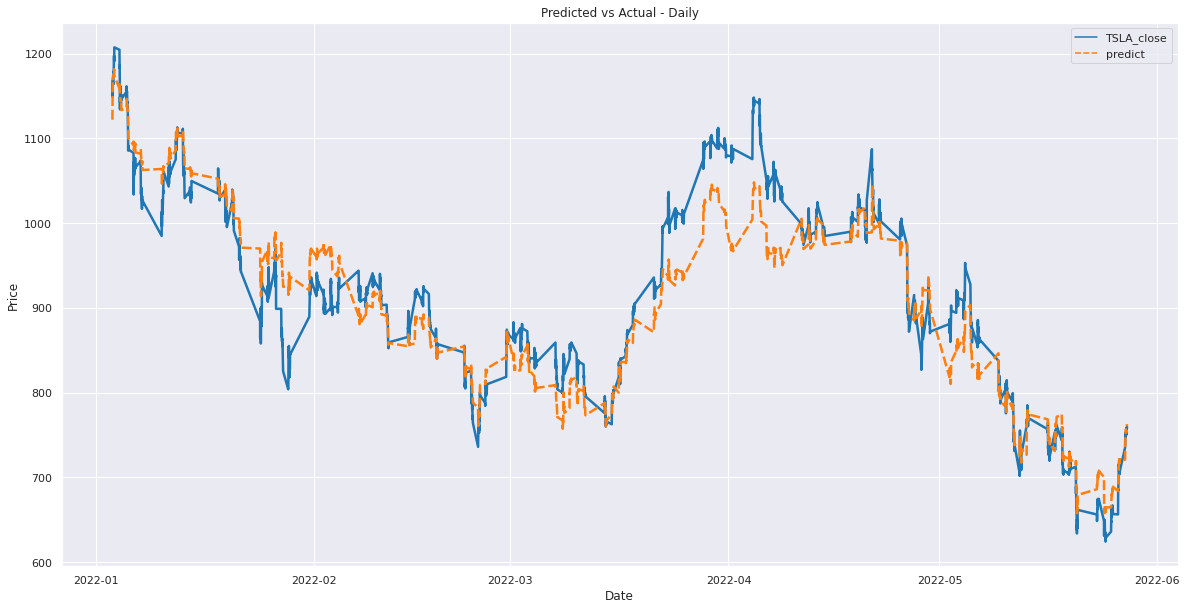

In [ ]:
plt.figure(figsize=(20,10))
linep = sns.lineplot(data=df_Result, palette="tab10", linewidth=2.5)
linep.set(xlabel='Date', ylabel='Price', title='Predicted vs Actual - Daily')
plt.show()

In [ ]:
mean_absolute_percentage_error(df_Result['TSLA_close'],df_Result['predict'])

3.2589087428938623

In [ ]:
mean_percentage_error(df_Result['TSLA_close'],df_Result['predict'])

0.7091255026682687

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_Result['TSLA_close'],df_Result['predict'],squared=False)

39.81590929793277

In [ ]:
np.mean(count_time)

13.721905855905442